In [644]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score


# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

In [645]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [647]:
#Irma
# check for duplicates
duplicates = df[df.duplicated()]

if len(duplicates) == 0:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [648]:
#Allie
#checking the counts of the Channel and Region columns
for col in df.iloc[:, 0:2]:
    print(df[col].value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


Allie:
- There are no missing values. The categorical variables have been encoded as:
- Channel:
    - 1 Hotel/Restaurant/Cafe
    - 2 Retail
- Region:
    - 1 Lisbon
    - 2 Oporto
    - 3 Other

In [649]:
df.describe()

Channel  Region     Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
count   440.00  440.00    440.00   440.00   440.00   440.00            440.00   
mean      1.32    2.54  12000.30  5796.27  7951.28  3071.93           2881.49   
std       0.47    0.77  12647.33  7380.38  9503.16  4854.67           4767.85   
min       1.00    1.00      3.00    55.00     3.00    25.00              3.00   
25%       1.00    2.00   3127.75  1533.00  2153.00   742.25            256.75   
50%       1.00    3.00   8504.00  3627.00  4755.50  1526.00            816.50   
75%       2.00    3.00  16933.75  7190.25 10655.75  3554.25           3922.00   
max       2.00    3.00 112151.00 73498.00 92780.00 60869.00          40827.00   

       Delicassen  
count      440.00  
mean      1524.87  
std       2820.11  
min          3.00  
25%        408.25  
50%        965.50  
75%       1820.25  
max      47943.00

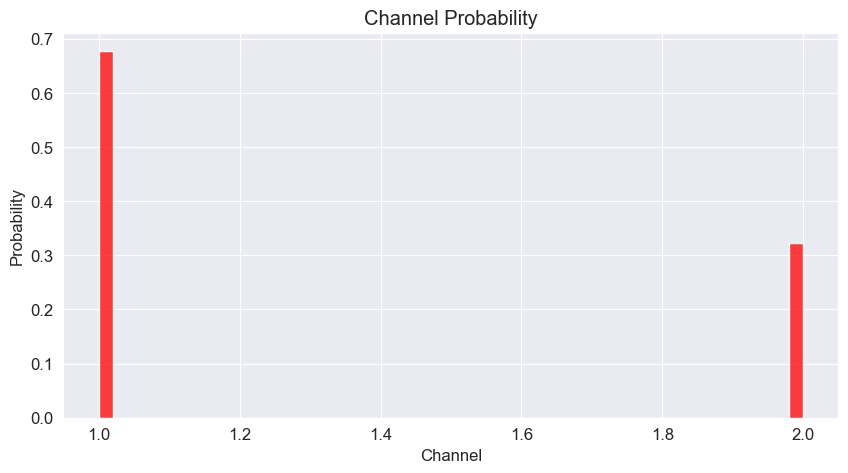

In [650]:
#Irma
#Probability of being from either channel

plt.figure(figsize=(10,5))
sns.histplot(df['Channel'], bins = 50, color = 'red', stat='probability')
plt.title('Channel Probability')
plt.show()

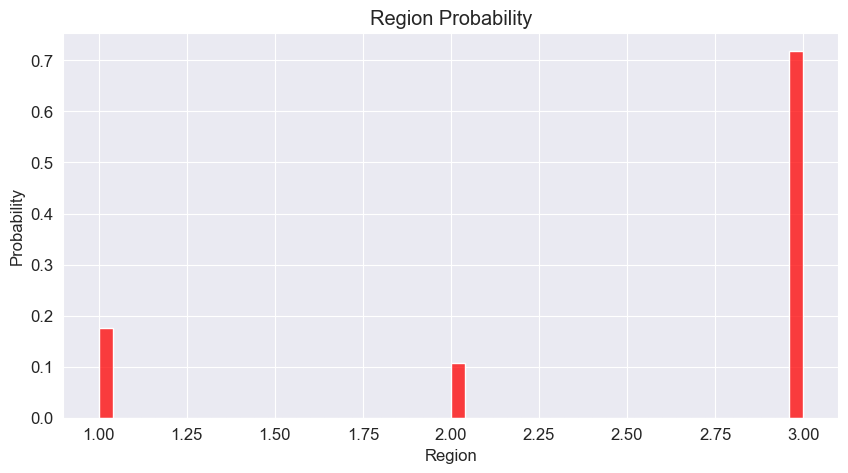

In [651]:
#Irma
#Probability of being from each region

plt.figure(figsize=(10,5))
sns.histplot(df['Region'], bins = 50, color = 'red', stat='probability')
plt.title('Region Probability')
plt.show()

In [652]:
#Irma
#Channel Values
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Channel", color="burlywood")
plt.title("Channel Value Counts")
plt.show()

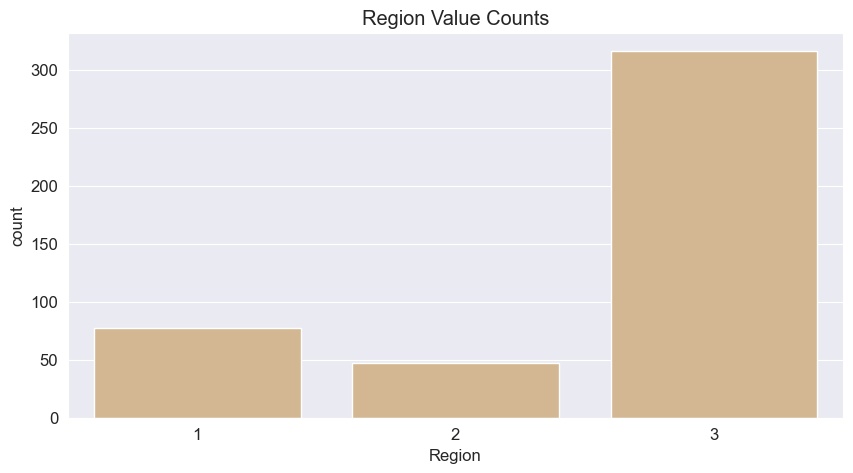

In [653]:
#Irma
#Region Value Counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Region", color="burlywood")
plt.title("Region Value Counts")
plt.show()

In [654]:
#Irma
#Distribution of Regions
plt.figure(figsize=(10,6))
region_counts = df["Region"].value_counts().sort_index()
labels = region_counts.index
plt.pie(region_counts, autopct="%1.1f%%", labels=labels)
plt.title("Distribution of Regions")
plt.legend(title="Regions", loc="center left", bbox_to_anchor=(1,0.5))
plt.axis("equal")
plt.show()


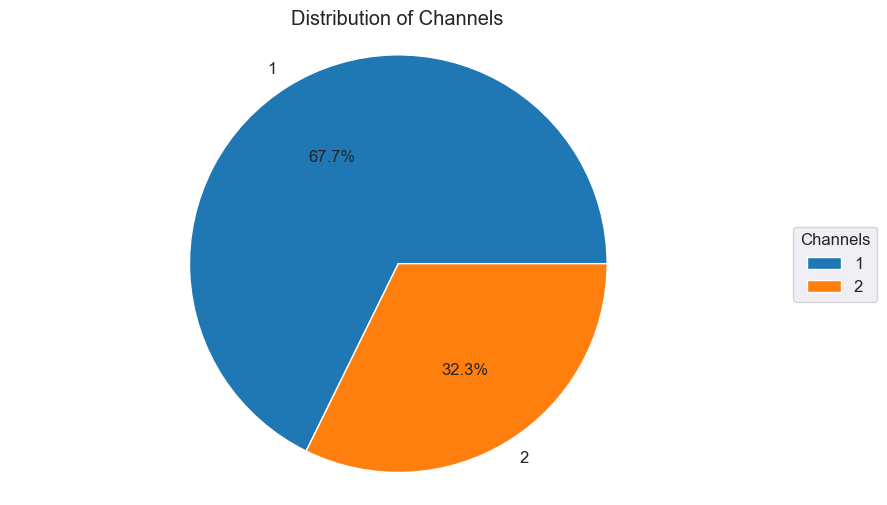

In [655]:
#Irma
#Distribution of Channel
plt.figure(figsize=(10,6))
plt.pie(df["Channel"].value_counts(),autopct="%1.1f%%", labels=np.unique(df["Channel"]))
plt.title("Distribution of Channels")
plt.legend(title="Channels", loc="center left", bbox_to_anchor=(1,0.5))
plt.axis("equal")
plt.show()

In [656]:
#Irma
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Channel', data=df)
plt.title('Number of Customers in Each Channel by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Channel', loc='upper right')
plt.show()

In [657]:
#Irma
# Calculate the average amount spent on each item
average_spent = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

# Convert the resulting Series to a DataFrame and reset the index
average_spent_df = average_spent.to_frame().reset_index()
average_spent_df.columns = ['Item', 'Average Spent']

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=average_spent_df, x='Item', y='Average Spent', palette='viridis')
plt.title('Average Amount Spent on Each Item')
plt.show()

In [658]:
#Irma
# Calculate the sum of spending for each channel and item
channel_spent = df.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum()

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Spending on Each Item per Channel')

# Define the items and their corresponding axes indices
items = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
axes_indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Plot the spending for each channel on each item
for item, ax_idx in zip(items, axes_indices):
    sns.barplot(data=channel_spent, x=channel_spent.index, y=item, ax=axes[ax_idx], palette='viridis')
    axes[ax_idx].set_title(item)
    axes[ax_idx].set_xlabel('Channel')
    axes[ax_idx].set_ylabel('Spending')

plt.tight_layout()
plt.show()

Irma:
- Channel 1 spent the most on Fresh, Frozen, and Delicatessen. Channel 2 spent the most on Milk, Grocery, and Detergents_paper. Channel 2 is retail. Telling us that they are our biggest customers. 

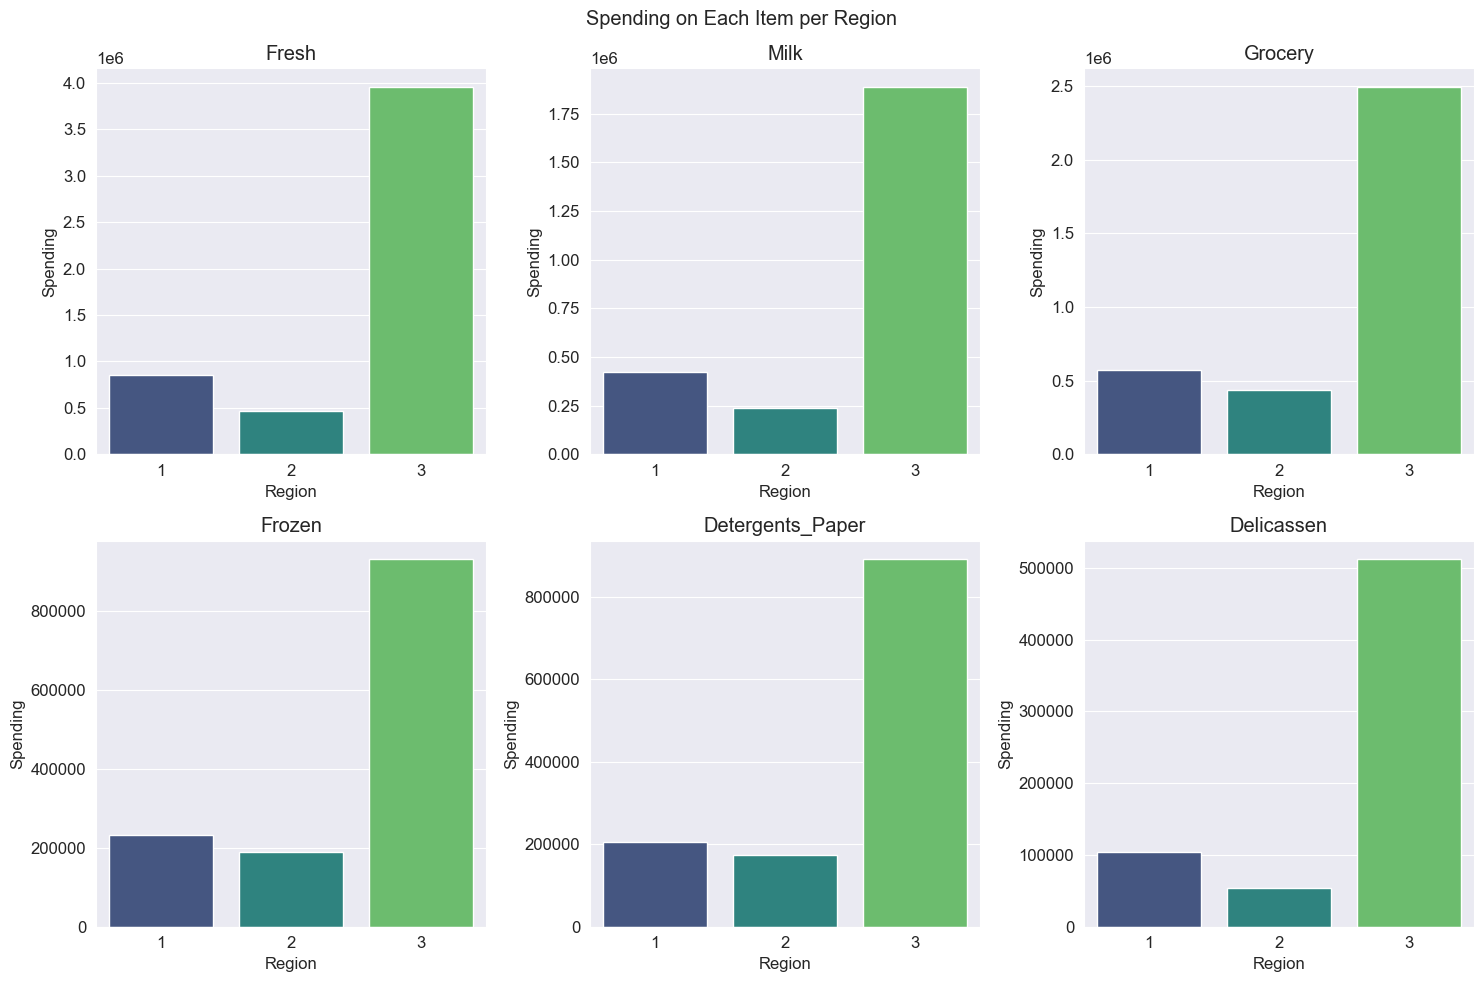

In [659]:
#Irma
# Calculate the sum of spending for each region and item
region_spent = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum()

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Spending on Each Item per Region')

# Define the items and their corresponding axes indices
items = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
axes_indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Plot the spending for each region on each item
for item, ax_idx in zip(items, axes_indices):
    sns.barplot(data=region_spent, x=region_spent.index, y=item, ax=axes[ax_idx], palette='viridis')
    axes[ax_idx].set_title(item)
    axes[ax_idx].set_xlabel('Region')
    axes[ax_idx].set_ylabel('Spending')

plt.tight_layout()
plt.show()

Irma:
- We can see that region 3 is the biggest spender, this is because it the one with the highest count at 316. 

In [660]:
#Irma
# Select the columns you want to include in the scatter matrix
columns_to_include = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create the scatter matrix
sns.pairplot(df[columns_to_include])

# Show the plot
plt.show()

In [661]:
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [662]:
import copy

irma_df = copy.deepcopy(df)
allie_df = copy.deepcopy(df)
Abdiel_df = copy.deepcopy(df)


In [663]:
#Irma
#Preprocessing MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# define columns to scale (all except the first)
cols_to_scale = irma_df.columns[2:]

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
irma_df[cols_to_scale] = scaler.fit_transform(irma_df[cols_to_scale])

# show the scaled data
print(irma_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3   0.11  0.13     0.08    0.00              0.07        0.03
1        2       3   0.06  0.13     0.10    0.03              0.08        0.04
2        2       3   0.06  0.12     0.08    0.04              0.09        0.16
3        1       3   0.12  0.02     0.05    0.10              0.01        0.04
4        2       3   0.20  0.07     0.08    0.06              0.04        0.11


In [664]:
#Irma
#DataFrame with scaled values
irma_df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3   0.11  0.13     0.08    0.00              0.07        0.03
1        2       3   0.06  0.13     0.10    0.03              0.08        0.04
2        2       3   0.06  0.12     0.08    0.04              0.09        0.16
3        1       3   0.12  0.02     0.05    0.10              0.01        0.04
4        2       3   0.20  0.07     0.08    0.06              0.04        0.11

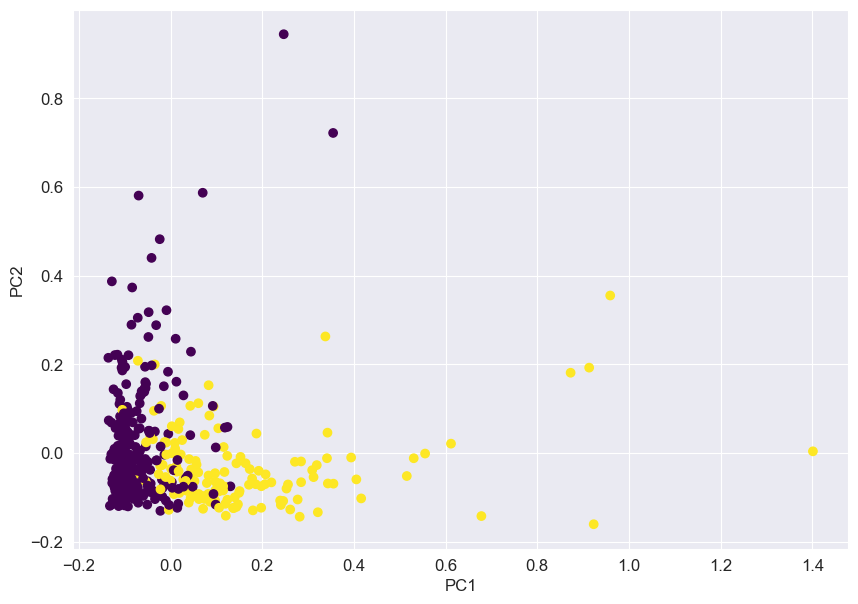

In [665]:
#Irma
#PCA before clustering on Channel column

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model to the data
irma_pca = PCA(n_components=2)
irma_principal_components = irma_pca.fit_transform(irma_df[cols_to_scale])

# Create PCA plot
plt.scatter(irma_principal_components[:,0], irma_principal_components[:,1], c=irma_df['Channel'], cmap = "viridis")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

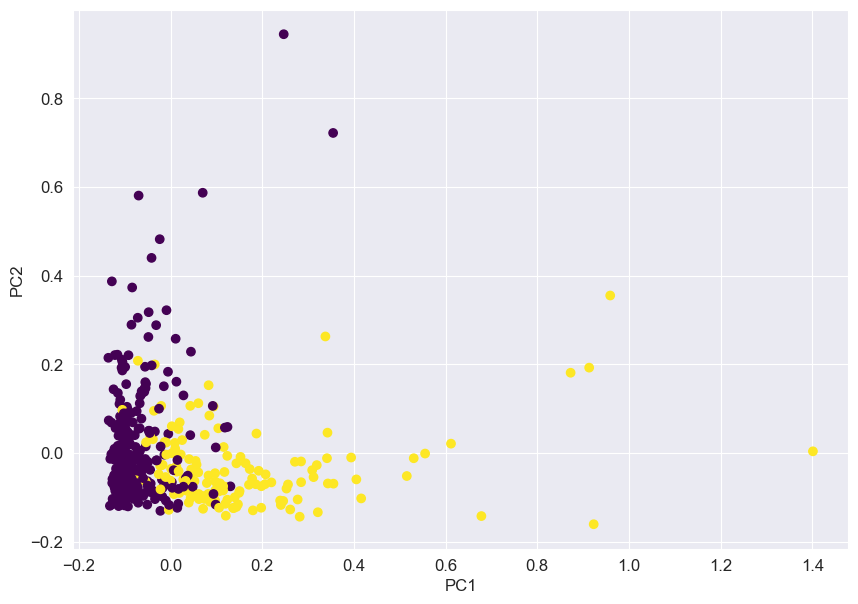

In [666]:
#Irma
#PCA before clustering on Region column

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model to the data
irma_pca = PCA(n_components=2)
irma_principal_components = irma_pca.fit_transform(irma_df[cols_to_scale])

# Create PCA plot
plt.scatter(irma_principal_components[:,0], irma_principal_components[:,1], c=irma_df['Channel'], cmap = "viridis")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [667]:
#Irma
#data frame that has column to depict what Cluster each product fell in. 

from sklearn.cluster import KMeans

# define columns to cluster (all except the first)
irma_cols_to_cluster = irma_df.columns[2:]

# apply K-means clustering to the data
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
irma_clusters = kmeans.fit_predict(irma_df[irma_cols_to_cluster])

# add cluster labels to the data frame
irma_df['Cluster'] = irma_clusters

# show the resulting data frame with cluster labels
print(irma_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3   0.11  0.13     0.08    0.00              0.07   
1        2       3   0.06  0.13     0.10    0.03              0.08   
2        2       3   0.06  0.12     0.08    0.04              0.09   
3        1       3   0.12  0.02     0.05    0.10              0.01   
4        2       3   0.20  0.07     0.08    0.06              0.04   

   Delicassen  Cluster  
0        0.03        0  
1        0.04        0  
2        0.16        0  
3        0.04        0  
4        0.11        2  


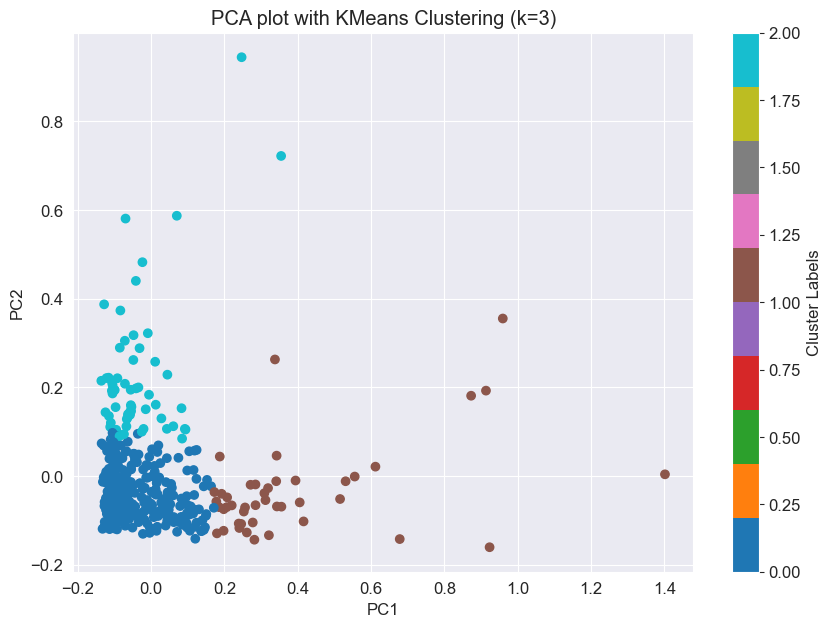

In [668]:
#Irma
#PCA plot being applied on the three clusters generated by KMeans

irma_labels = kmeans.fit_predict(irma_df[cols_to_scale])

# Create PCA plot with KMeans clustering labels
scatter = plt.scatter(irma_principal_components[:, 0], irma_principal_components[:, 1], c=irma_labels, cmap='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA plot with KMeans Clustering (k={n_clusters})')

# Add a colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

plt.show()

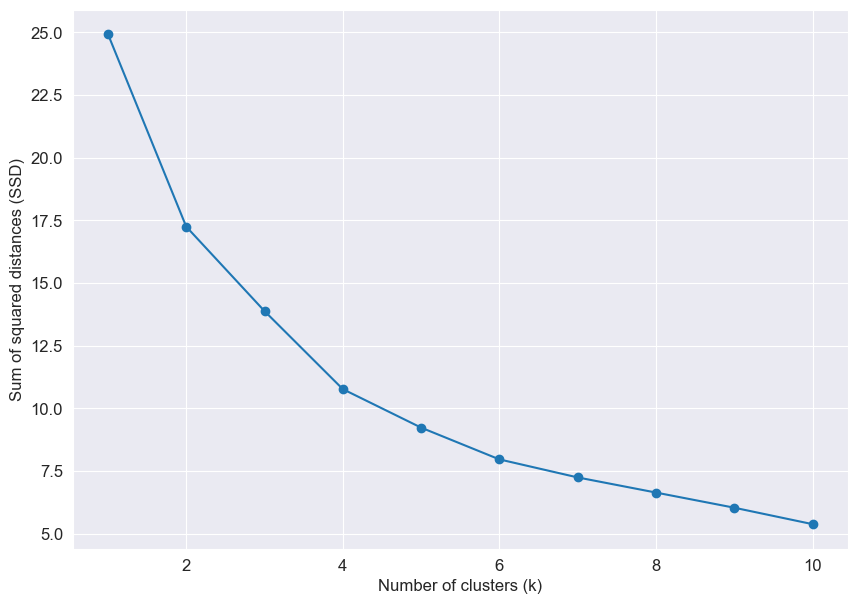

In [669]:
#Irma
#Elbow method to help determine the optimal number of clusters. 

# calculate SSD for different values of k
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(irma_df[irma_cols_to_cluster])
    ssd.append(kmeans.inertia_)

# plot the results
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.show()

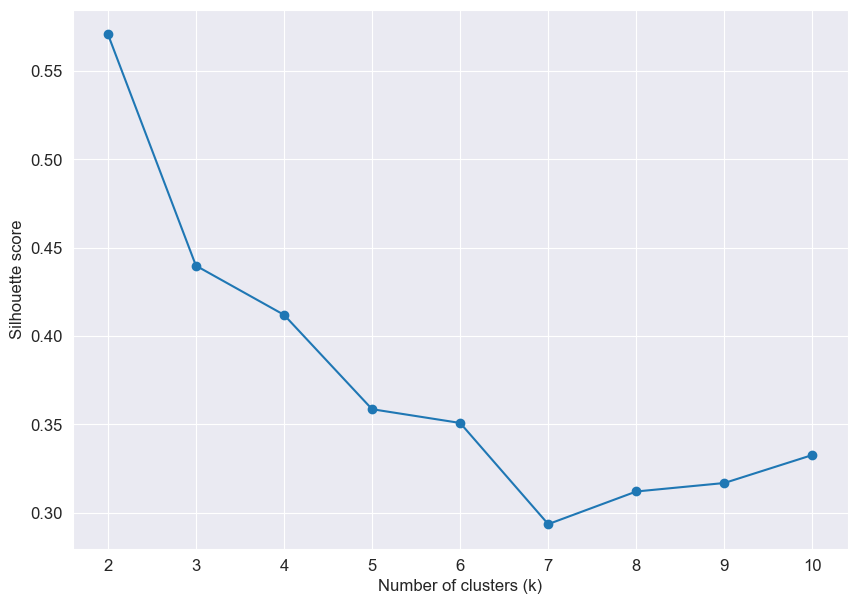

In [670]:
#Irma
from sklearn.metrics import silhouette_score

# calculate silhouette score for different values of k
irma_silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    irma_clusters = kmeans.fit_predict(irma_df[irma_cols_to_cluster])
    irma_silhouette_scores.append(silhouette_score(irma_df[irma_cols_to_cluster], irma_clusters))

# plot the results
plt.plot(range(2, 11), irma_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [671]:
#Irma
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
irma_score = silhouette_score(irma_principal_components, irma_labels)

print(f"Silhouette score: {irma_score:.2f}")

Silhouette score: 0.49


In [672]:
#Irma
#Apply Kmeans on 2 clusters as suggested by the elbow method

# apply K-means clustering to the data
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
irma_clusters = kmeans.fit_predict(irma_df[irma_cols_to_cluster])

# add cluster labels to the data frame
irma_df['Cluster'] = irma_clusters

# show the resulting data frame with cluster labels
print(irma_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3   0.11  0.13     0.08    0.00              0.07   
1        2       3   0.06  0.13     0.10    0.03              0.08   
2        2       3   0.06  0.12     0.08    0.04              0.09   
3        1       3   0.12  0.02     0.05    0.10              0.01   
4        2       3   0.20  0.07     0.08    0.06              0.04   

   Delicassen  Cluster  
0        0.03        0  
1        0.04        0  
2        0.16        0  
3        0.04        0  
4        0.11        0  


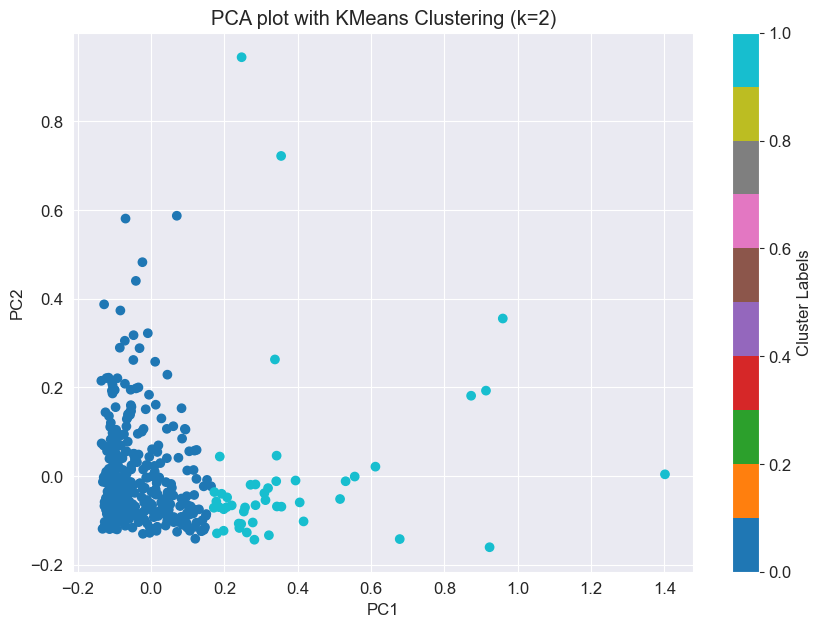

In [673]:
#Irma
#PCA plot being applied on two clusters generated by KMeans

irma_labels = kmeans.fit_predict(irma_df[cols_to_scale])

# Create PCA plot with KMeans clustering labels
scatter = plt.scatter(irma_principal_components[:, 0], irma_principal_components[:, 1], c=irma_labels, cmap='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA plot with KMeans Clustering (k={n_clusters})')

# Optional: Add a colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

plt.show()

In [674]:
#Irma
# examine the characteristics of each cluster
irma_cluster_means = irma_df.groupby('Cluster')[irma_cols_to_cluster].mean()

# Display the mean values in a nicely formatted table
pd.set_option('display.float_format', '{:.2f}'.format)
print(irma_cluster_means)

         Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster                                                            
0         0.11  0.06     0.06    0.05              0.04        0.03
1         0.10  0.27     0.30    0.05              0.32        0.07


In [675]:
#Irma
from tabulate import tabulate

# Calculate the number of data points for each channel and region within each cluster
irma_channel_region_counts = irma_df.groupby(['Cluster', 'Channel', 'Region']).size().reset_index(name='Count')

# Display the distribution of channels and regions within each cluster
print(tabulate(irma_channel_region_counts, headers='keys', tablefmt='pretty', floatfmt='.2f'))

+---+---------+---------+--------+-------+
|   | Cluster | Channel | Region | Count |
+---+---------+---------+--------+-------+
| 0 |    0    |    1    |   1    |  59   |
| 1 |    0    |    1    |   2    |  28   |
| 2 |    0    |    1    |   3    |  209  |
| 3 |    0    |    2    |   1    |  11   |
| 4 |    0    |    2    |   2    |  11   |
| 5 |    0    |    2    |   3    |  75   |
| 6 |    1    |    1    |   3    |   2   |
| 7 |    1    |    2    |   1    |   7   |
| 8 |    1    |    2    |   2    |   8   |
| 9 |    1    |    2    |   3    |  30   |
+---+---------+---------+--------+-------+


In [676]:
#Irma
# cross-tabulation table to display the number of customers in each channel for each cluster

cross_tab = pd.crosstab(irma_df['Cluster'], irma_df['Channel'])
print(cross_tab)


Channel    1   2
Cluster         
0        296  97
1          2  45


In [677]:
#Irma
# calculating cluster entropy based on the 'Channel' column:
def cluster_entropy(df, cluster_col, class_col):
    cluster_entropy_dict = {}
    clusters = df[cluster_col].unique()

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster]
        class_counts = cluster_data[class_col].value_counts()
        total = class_counts.sum()
        entropy = -np.sum((class_counts / total) * np.log2(class_counts / total))
        cluster_entropy_dict[cluster] = entropy

    return cluster_entropy_dict

entropy_values = cluster_entropy(irma_df, 'Cluster', 'Channel')
print(entropy_values)


{0: 0.8061978637895977, 1: 0.25387844029816153}


In [678]:
#Irma
# cross-tabulation table to display the number of customers in each region for each cluster

cross_tab = pd.crosstab(irma_df['Cluster'], irma_df['Region'])
print(cross_tab)

Region    1   2    3
Cluster             
0        70  39  284
1         7   8   32


In [679]:
#Irma
# calculating cluster entropy based on the 'Region' column:

def cluster_entropy(df, cluster_col, class_col):
    cluster_entropy_dict = {}
    clusters = df[cluster_col].unique()

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster]
        class_counts = cluster_data[class_col].value_counts()
        total = class_counts.sum()
        entropy = -np.sum((class_counts / total) * np.log2(class_counts / total))
        cluster_entropy_dict[cluster] = entropy

    return cluster_entropy_dict

# Assuming your DataFrame is named df, and you already added the 'Cluster' column to it
entropy_values = cluster_entropy(irma_df, 'Cluster', 'Region')
print(entropy_values)


{0: 1.1127654522303492, 1: 1.2215785441371432}


In [680]:
allie_df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [681]:
#allie
#removing outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Set the lower and upper bounds for the 'Delicassen' column
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

not_outliers = (df >= lower_bound) & (df <= upper_bound)
allie_df_without_outliers = df[not_outliers.all(axis=1)]
allie_df_without_outliers

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669  9656     7561     214              2674   
1          2       3   7057  9810     9568    1762              3293   
3          1       3  13265  1196     4221    6404               507   
5          2       3   9413  8259     5126     666              1795   
6          2       3  12126  3199     6975     480              3140   
..       ...     ...    ...   ...      ...     ...               ...   
432        1       3  21117  1162     4754     269              1328   
433        1       3   1982  3218     1493    1541               356   
434        1       3  16731  3922     7994     688              2371   
438        1       3  10290  1981     2232    1038               168   
439        1       3   2787  1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
3          1788  
5          1451  
6           545  
..          ...  
432         395  
433        1449  
434         838  
438        2125  
439          52  

[332 rows x 8 columns]

allie:
- removed 8 outliers

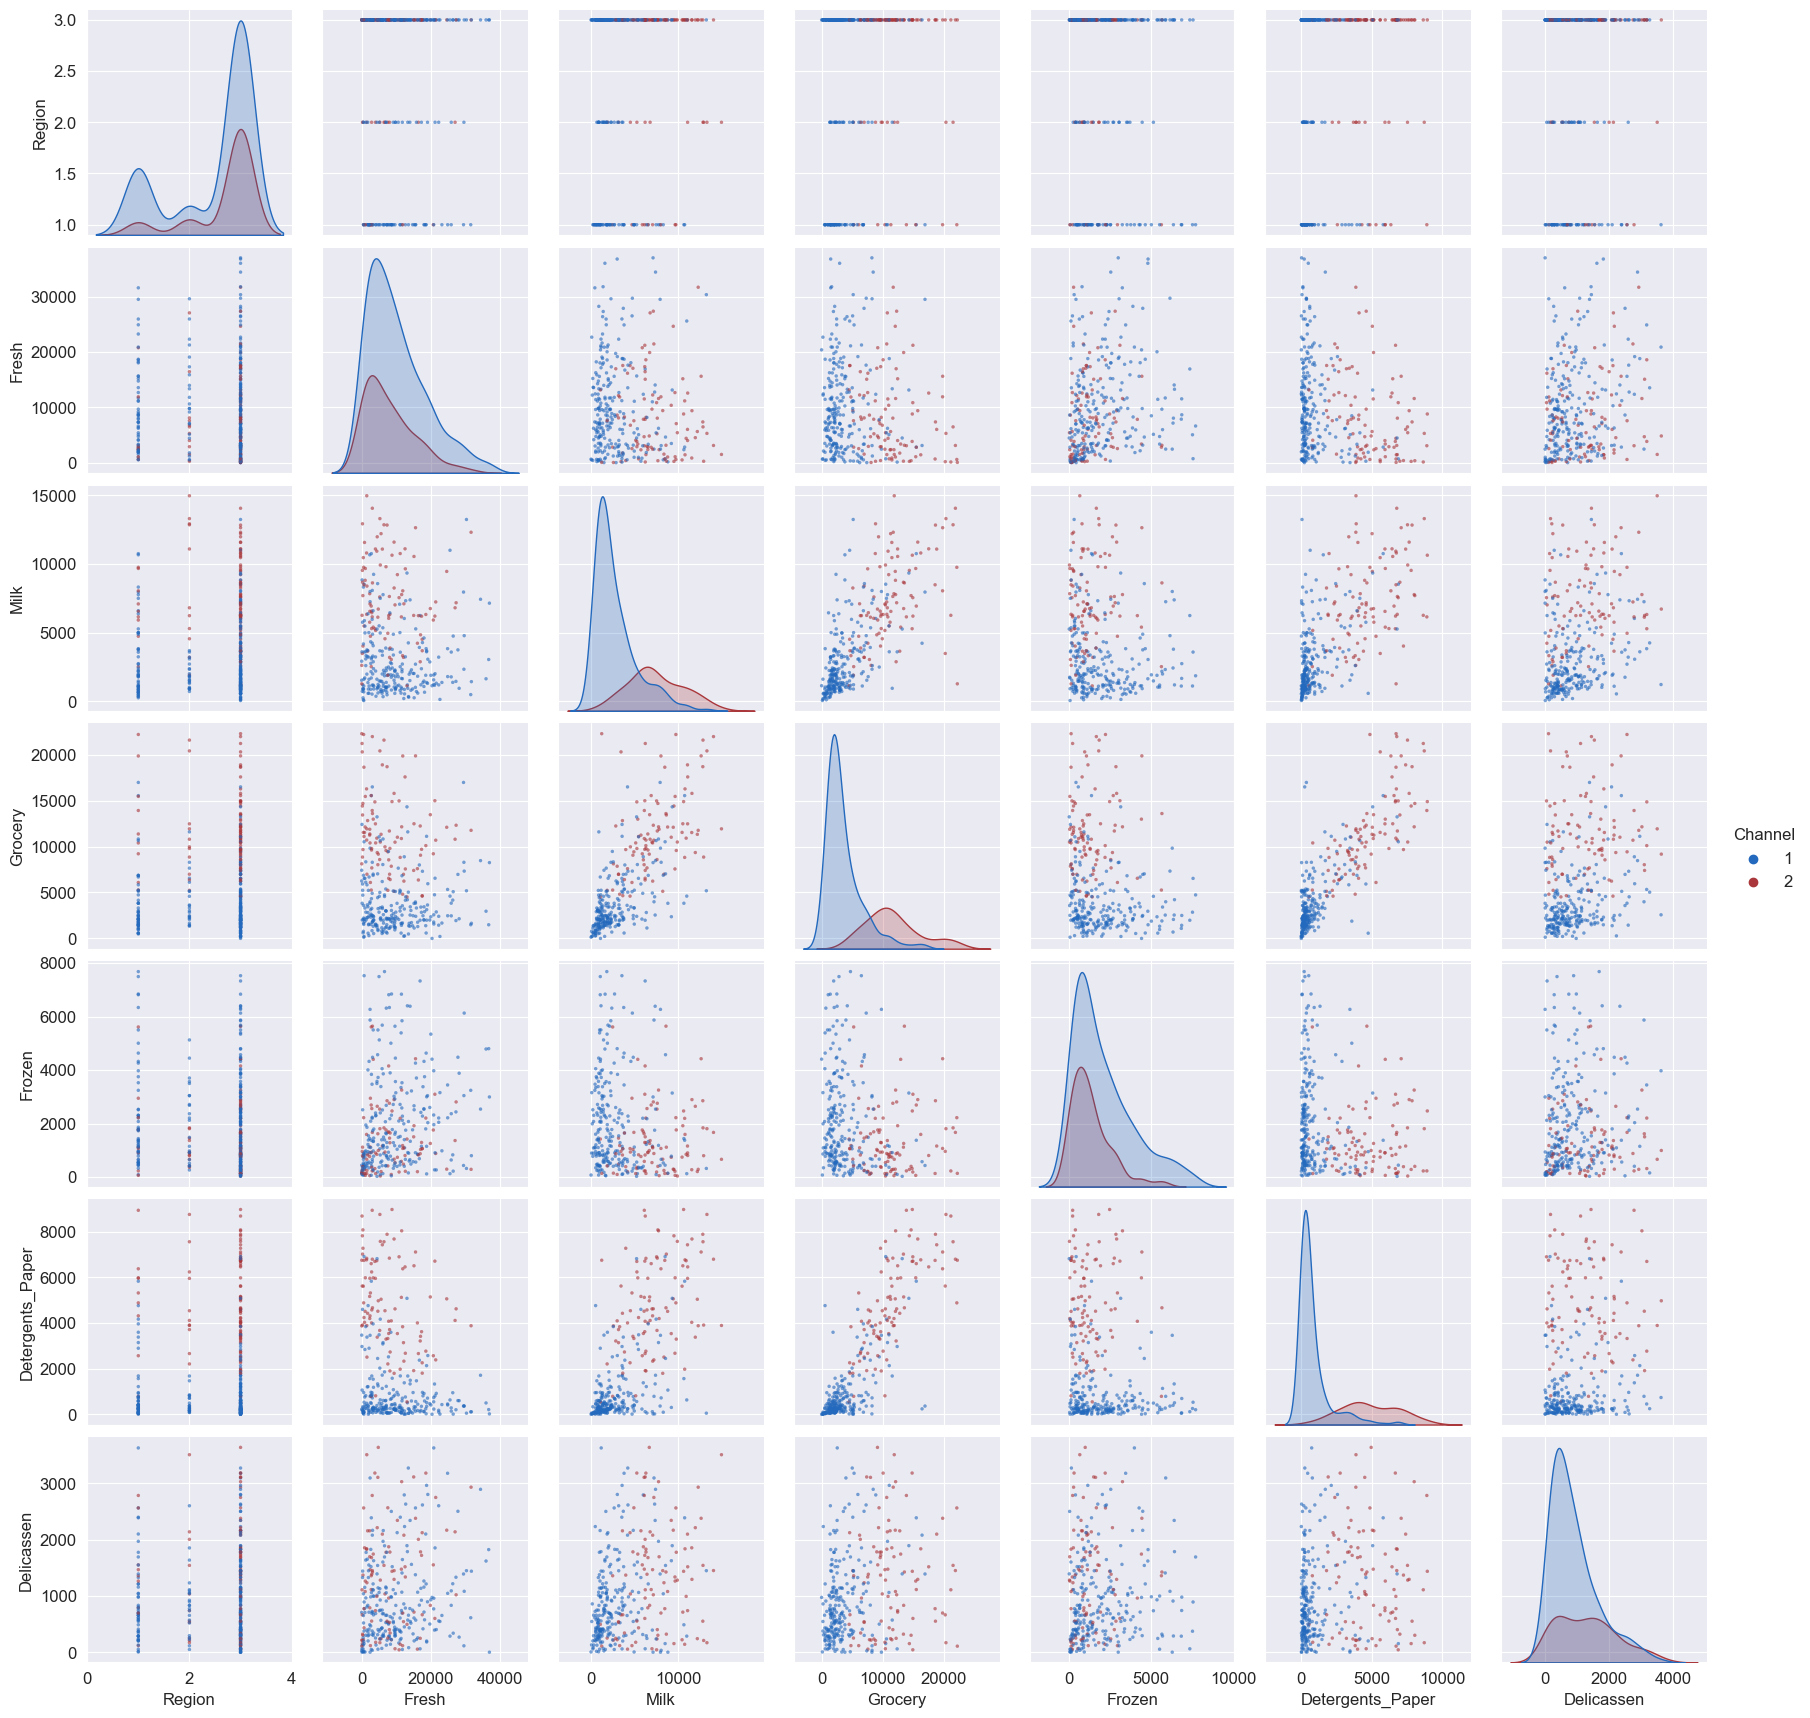

In [682]:
#allie
sns.pairplot(allie_df_without_outliers, hue = 'Channel', plot_kws={"s": 5, "alpha": 0.6, "edgecolor": None}, palette= "vlag")
plt.show()

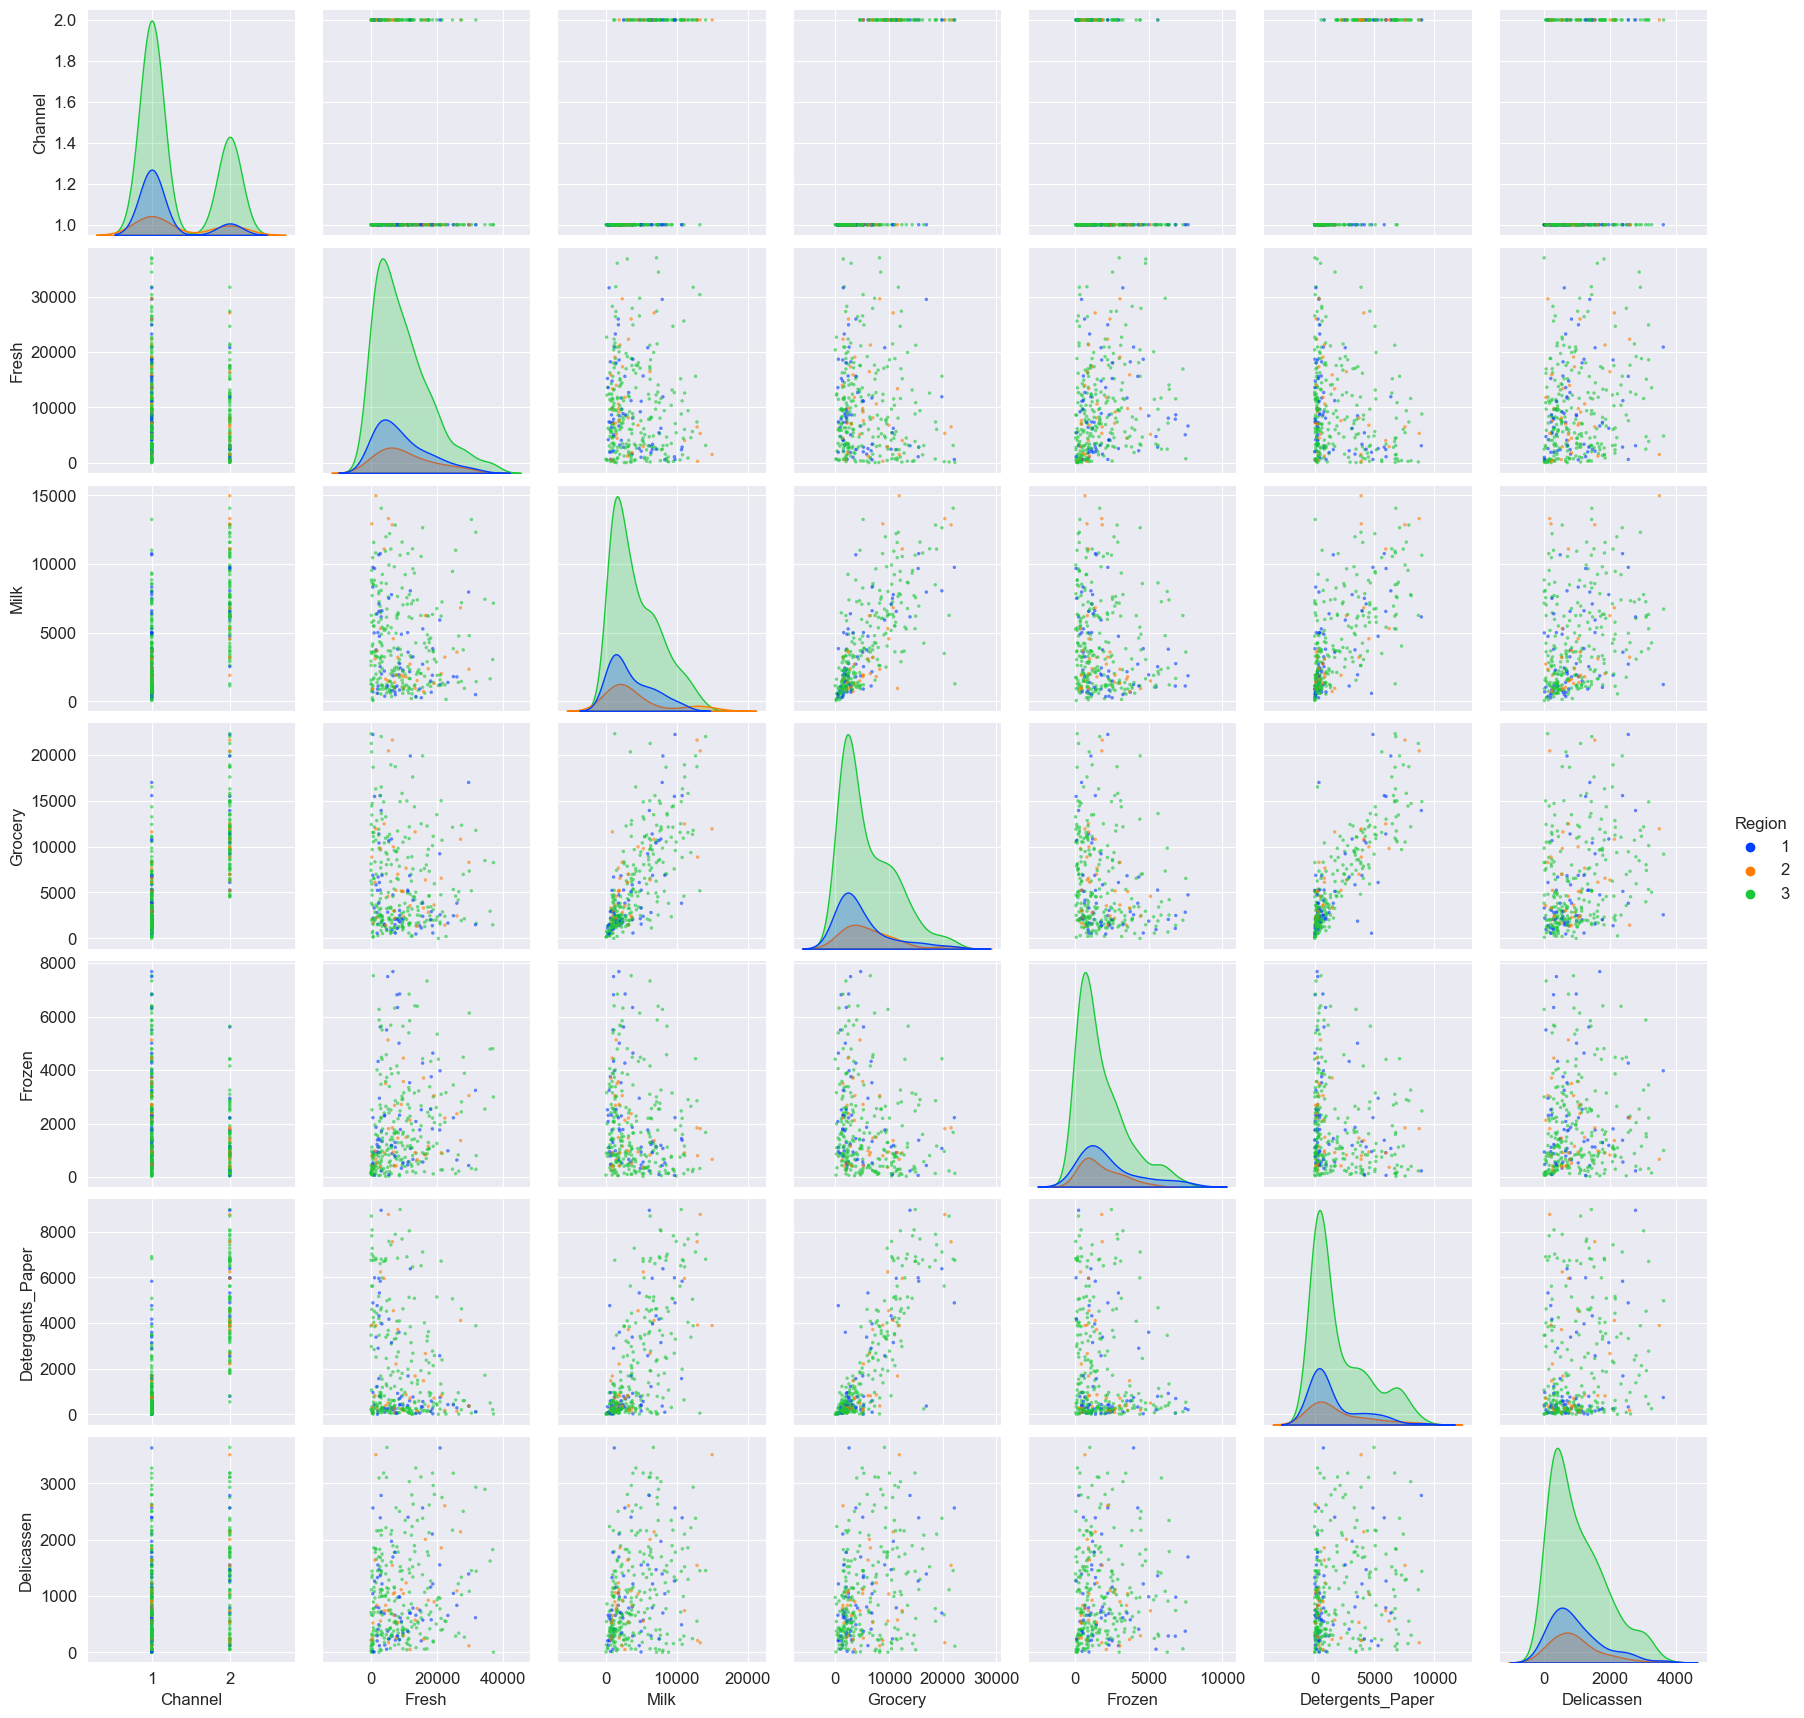

In [683]:
#allie
sns.pairplot(allie_df_without_outliers, hue = 'Region', plot_kws={"s": 5, "alpha": 0.6, "edgecolor": None}, palette= "bright")
plt.show()

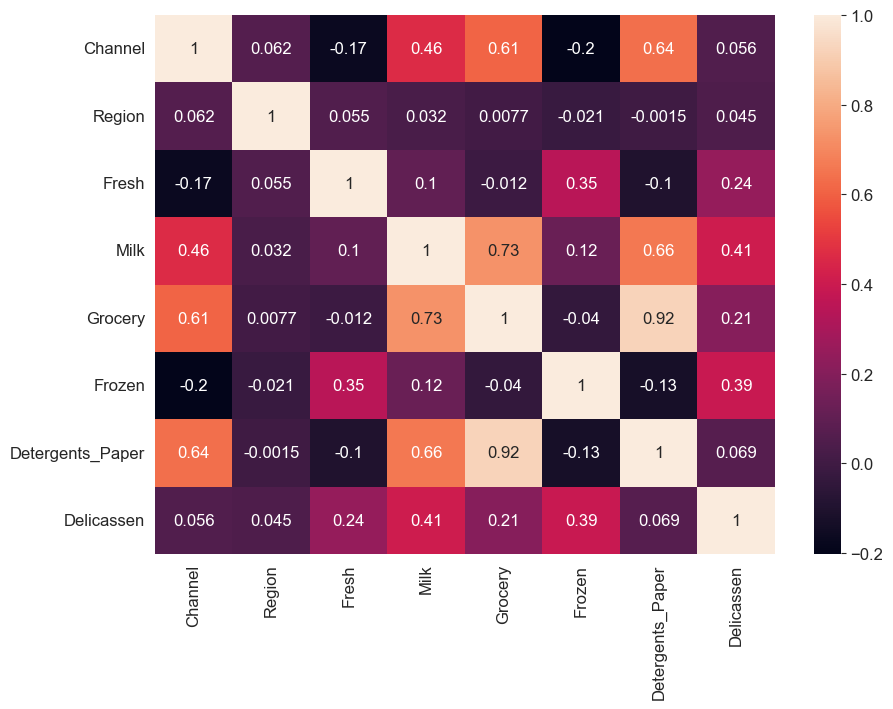

In [684]:
#allie
sns.heatmap(df.corr(), annot=True)
plt.show()

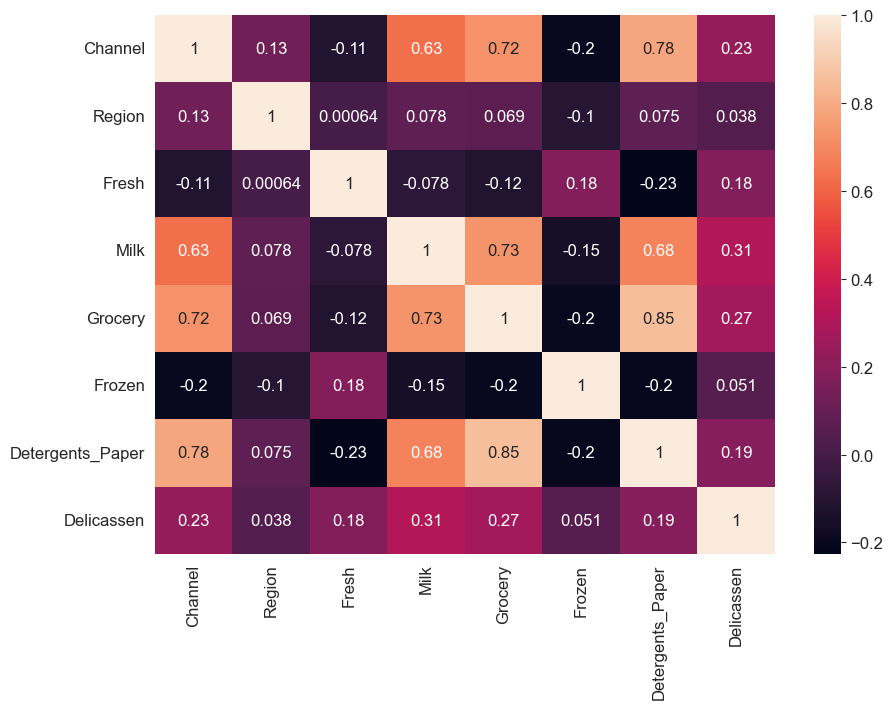

In [685]:
#allie
sns.heatmap(allie_df_without_outliers.corr(), annot=True)
plt.show()

the data has a lot of Multicollinearity. PCA will take care of it 

In [686]:
allie_df_without_outliers

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669  9656     7561     214              2674   
1          2       3   7057  9810     9568    1762              3293   
3          1       3  13265  1196     4221    6404               507   
5          2       3   9413  8259     5126     666              1795   
6          2       3  12126  3199     6975     480              3140   
..       ...     ...    ...   ...      ...     ...               ...   
432        1       3  21117  1162     4754     269              1328   
433        1       3   1982  3218     1493    1541               356   
434        1       3  16731  3922     7994     688              2371   
438        1       3  10290  1981     2232    1038               168   
439        1       3   2787  1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
3          1788  
5          1451  
6           545  
..          ...  
432         395  
433        1449  
434         838  
438        2125  
439          52  

[332 rows x 8 columns]

In [687]:
#allie
allie_scaler = MinMaxScaler()

allie_scaled_df = allie_scaler.fit_transform(allie_df_without_outliers[allie_df_without_outliers.columns])
allie_scaled_df = pd.DataFrame(data = allie_scaled_df, columns=allie_df_without_outliers.columns)



allie_scaled_df.head()



Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0     1.00    1.00   0.34  0.64     0.34    0.02              0.30        0.37
1     1.00    1.00   0.19  0.65     0.43    0.23              0.37        0.49
2     0.00    1.00   0.36  0.08     0.19    0.83              0.06        0.49
3     1.00    1.00   0.25  0.55     0.23    0.08              0.20        0.40
4     1.00    1.00   0.33  0.21     0.31    0.06              0.35        0.15

In [688]:
allie_scaled_df.describe()

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
count   332.00  332.00 332.00 332.00   332.00  332.00            332.00   
mean      0.29    0.77   0.26   0.27     0.26    0.24              0.22   
std       0.45    0.39   0.22   0.23     0.23    0.22              0.26   
min       0.00    0.00   0.00   0.00     0.00    0.00              0.00   
25%       0.00    0.50   0.08   0.09     0.09    0.07              0.03   
50%       0.00    1.00   0.20   0.20     0.17    0.16              0.08   
75%       1.00    1.00   0.38   0.42     0.40    0.33              0.39   
max       1.00    1.00   1.00   1.00     1.00    1.00              1.00   

       Delicassen  
count      332.00  
mean         0.28  
std          0.23  
min          0.00  
25%          0.10  
50%          0.21  
75%          0.40  
max          1.00

In [689]:
numerical = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


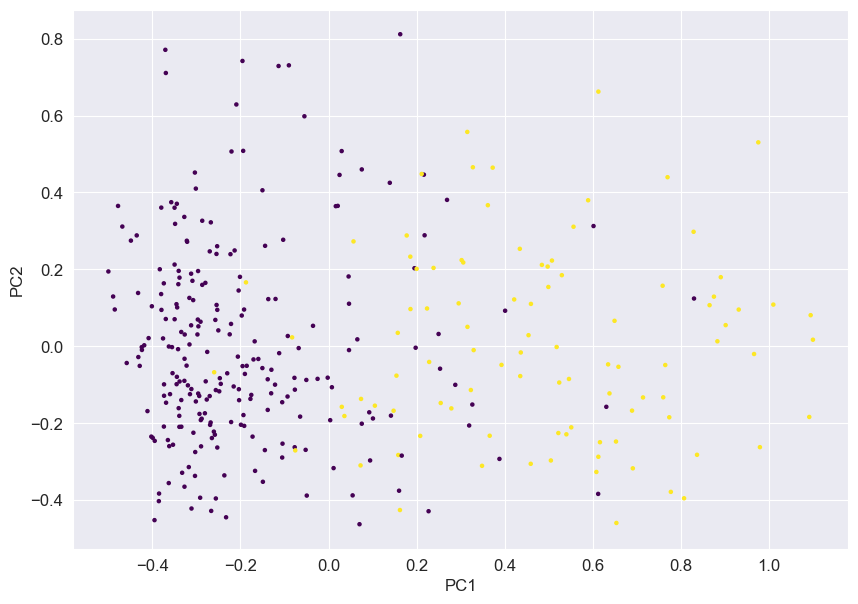

In [690]:
#Allie
#PCA 
allie_pca = PCA(n_components=2)
allie_principal_components = allie_pca.fit_transform(allie_scaled_df[numerical])

cmap = plt.cm.get_cmap('brg')

# Create PCA plot
allie_scatter = plt.scatter(allie_principal_components[:,0], allie_principal_components[:,1], cmap = 'viridis', s = 5, c = allie_scaled_df['Channel'])

plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()

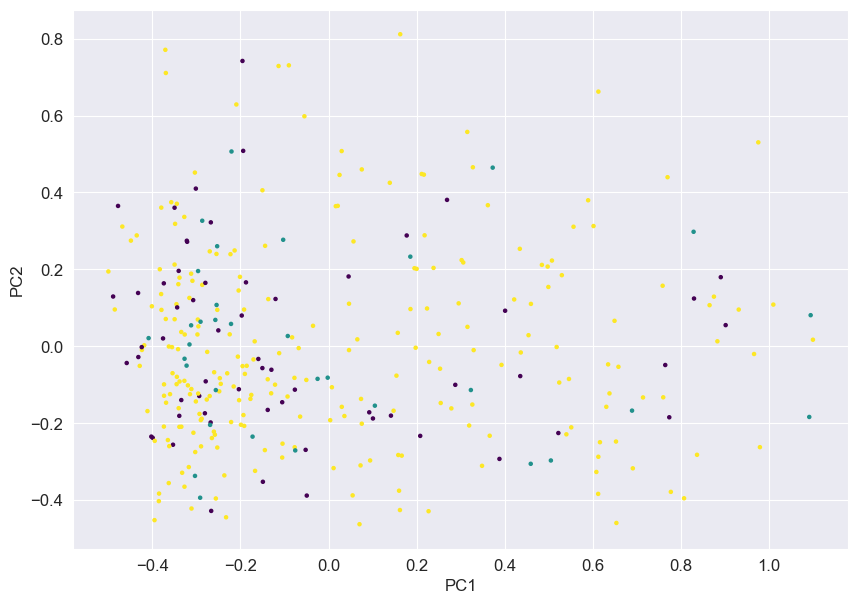

In [691]:
# Create PCA plot
allie_scatter = plt.scatter(allie_principal_components[:,0], allie_principal_components[:,1], cmap = 'viridis', s = 5, c = allie_scaled_df['Region'])

plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()

In [692]:
allie_pca.components_[:2]

array([[-0.12244372,  0.48853113,  0.537685  , -0.16613297,  0.62279173,
         0.20437713],
       [ 0.62109242,  0.12462282,  0.0388659 ,  0.45721226, -0.08956788,
         0.6165528 ]])

In [693]:
allie_eigenvectors = allie_pca.components_[:2]

pca1 = []
pca2 = []

# Format the eigenvectors using a loop
for i in range(len(allie_df.columns)-2):
    pca1.append(str(round(allie_eigenvectors[0,i], 2)) + 'x' + df.columns[i])
    pca2.append(str(round(allie_eigenvectors[1,i], 2)) + 'x' + df.columns[i])

# Print the formatted eigenvectors
print("PCA1: ", ' + '.join(pca1))
print("PCA2: ", ' + '.join(pca2))

PCA1:  -0.12xChannel + 0.49xRegion + 0.54xFresh + -0.17xMilk + 0.62xGrocery + 0.2xFrozen
PCA2:  0.62xChannel + 0.12xRegion + 0.04xFresh + 0.46xMilk + -0.09xGrocery + 0.62xFrozen


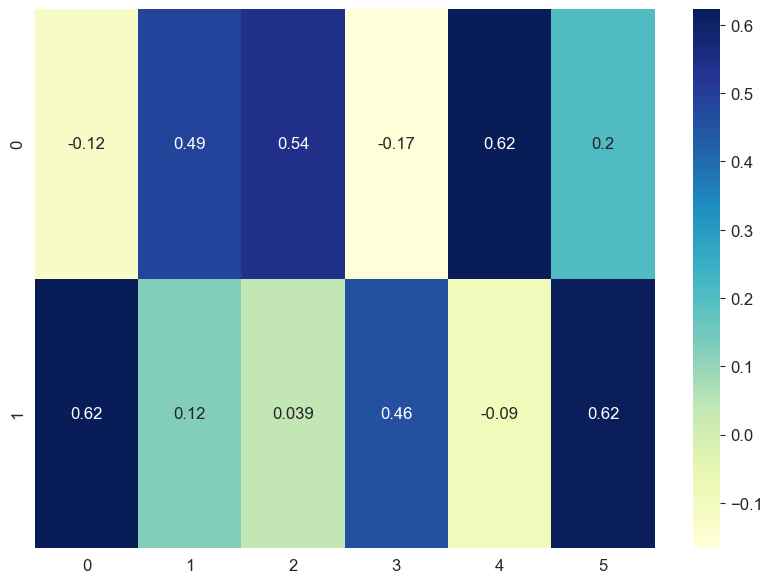

In [694]:
#Allie
allie_df_pca = pd.DataFrame(data=allie_principal_components, columns=['PC1', 'PC2'])

sns.heatmap(allie_eigenvectors, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

Allie:
- pca1 is mostly comprised of Milk, Grocery and Delicassen.
- pca2 is mostly comprised of Fresh, Detergents_Paper and Delicassen.


In [695]:
#Allie
db = DBSCAN(eps = 0.29, min_samples=100, metric='euclidean')
db.fit(allie_df_pca)
np.unique(db.labels_)
    

array([-1,  0], dtype=int64)

In [696]:
allie_y_preds = db.fit_predict(allie_df_pca)

plt.scatter(allie_df_pca.loc[allie_y_preds == 0, 'PC1'], allie_df_pca.loc[allie_y_preds == 0, 'PC2'], s = 5, c = 'red', label='cluster 1')
plt.scatter(allie_df_pca.loc[allie_y_preds == -1, 'PC1'], allie_df_pca.loc[allie_y_preds == -1, 'PC2'], s = 5, c = 'blue', label='cluster 2')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [697]:
#Allie
from sklearn.metrics import silhouette_score
silhouette_score(allie_df_pca, db.labels_)

0.4907409339757663

In [698]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer

#Separate the categorical columns ('Channel' and 'Region') from the numerical columns:
Abdiel_categorical_cols = ['Channel', 'Region']
Abdiel_numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Abdiel_scaler =  PowerTransformer()

#Fit and transform the numerical columns using the scaler object:
Abdiel_df[Abdiel_numerical_cols] = Abdiel_scaler.fit_transform(Abdiel_df[numerical_cols])

# show the scaled data
Abdiel_df.head()




Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3   0.41  0.98     0.39   -1.46              0.62        0.34
1        2       3  -0.11  1.00     0.63    0.08              0.75        0.60
2        2       3  -0.20  0.89     0.41    0.33              0.79        2.24
3        1       3   0.46 -0.97    -0.15    1.17             -0.37        0.61
4        2       3   1.03  0.41     0.35    0.74              0.37        1.74

In [699]:
# set the number of clusters you want to form
Abdiel_n_clusters = 3

# create an instance of AgglomerativeClustering and fit the preprocessed data
Abdiel_model = AgglomerativeClustering(n_clusters=Abdiel_n_clusters, affinity='euclidean', linkage='ward')
Abdiel_model.fit(Abdiel_df[Abdiel_numerical_cols])

# get the predicted labels for each data point
Abdiel_labels = Abdiel_model.labels_

# add cluster labels to the original dataframe
Abdiel_df['cluster_labels'] = Abdiel_labels

# print the updated dataframe
Abdiel_df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3   0.41  0.98     0.39   -1.46              0.62   
1        2       3  -0.11  1.00     0.63    0.08              0.75   
2        2       3  -0.20  0.89     0.41    0.33              0.79   
3        1       3   0.46 -0.97    -0.15    1.17             -0.37   
4        2       3   1.03  0.41     0.35    0.74              0.37   

   Delicassen  cluster_labels  
0        0.34               0  
1        0.60               0  
2        2.24               2  
3        0.61               1  
4        1.74               2

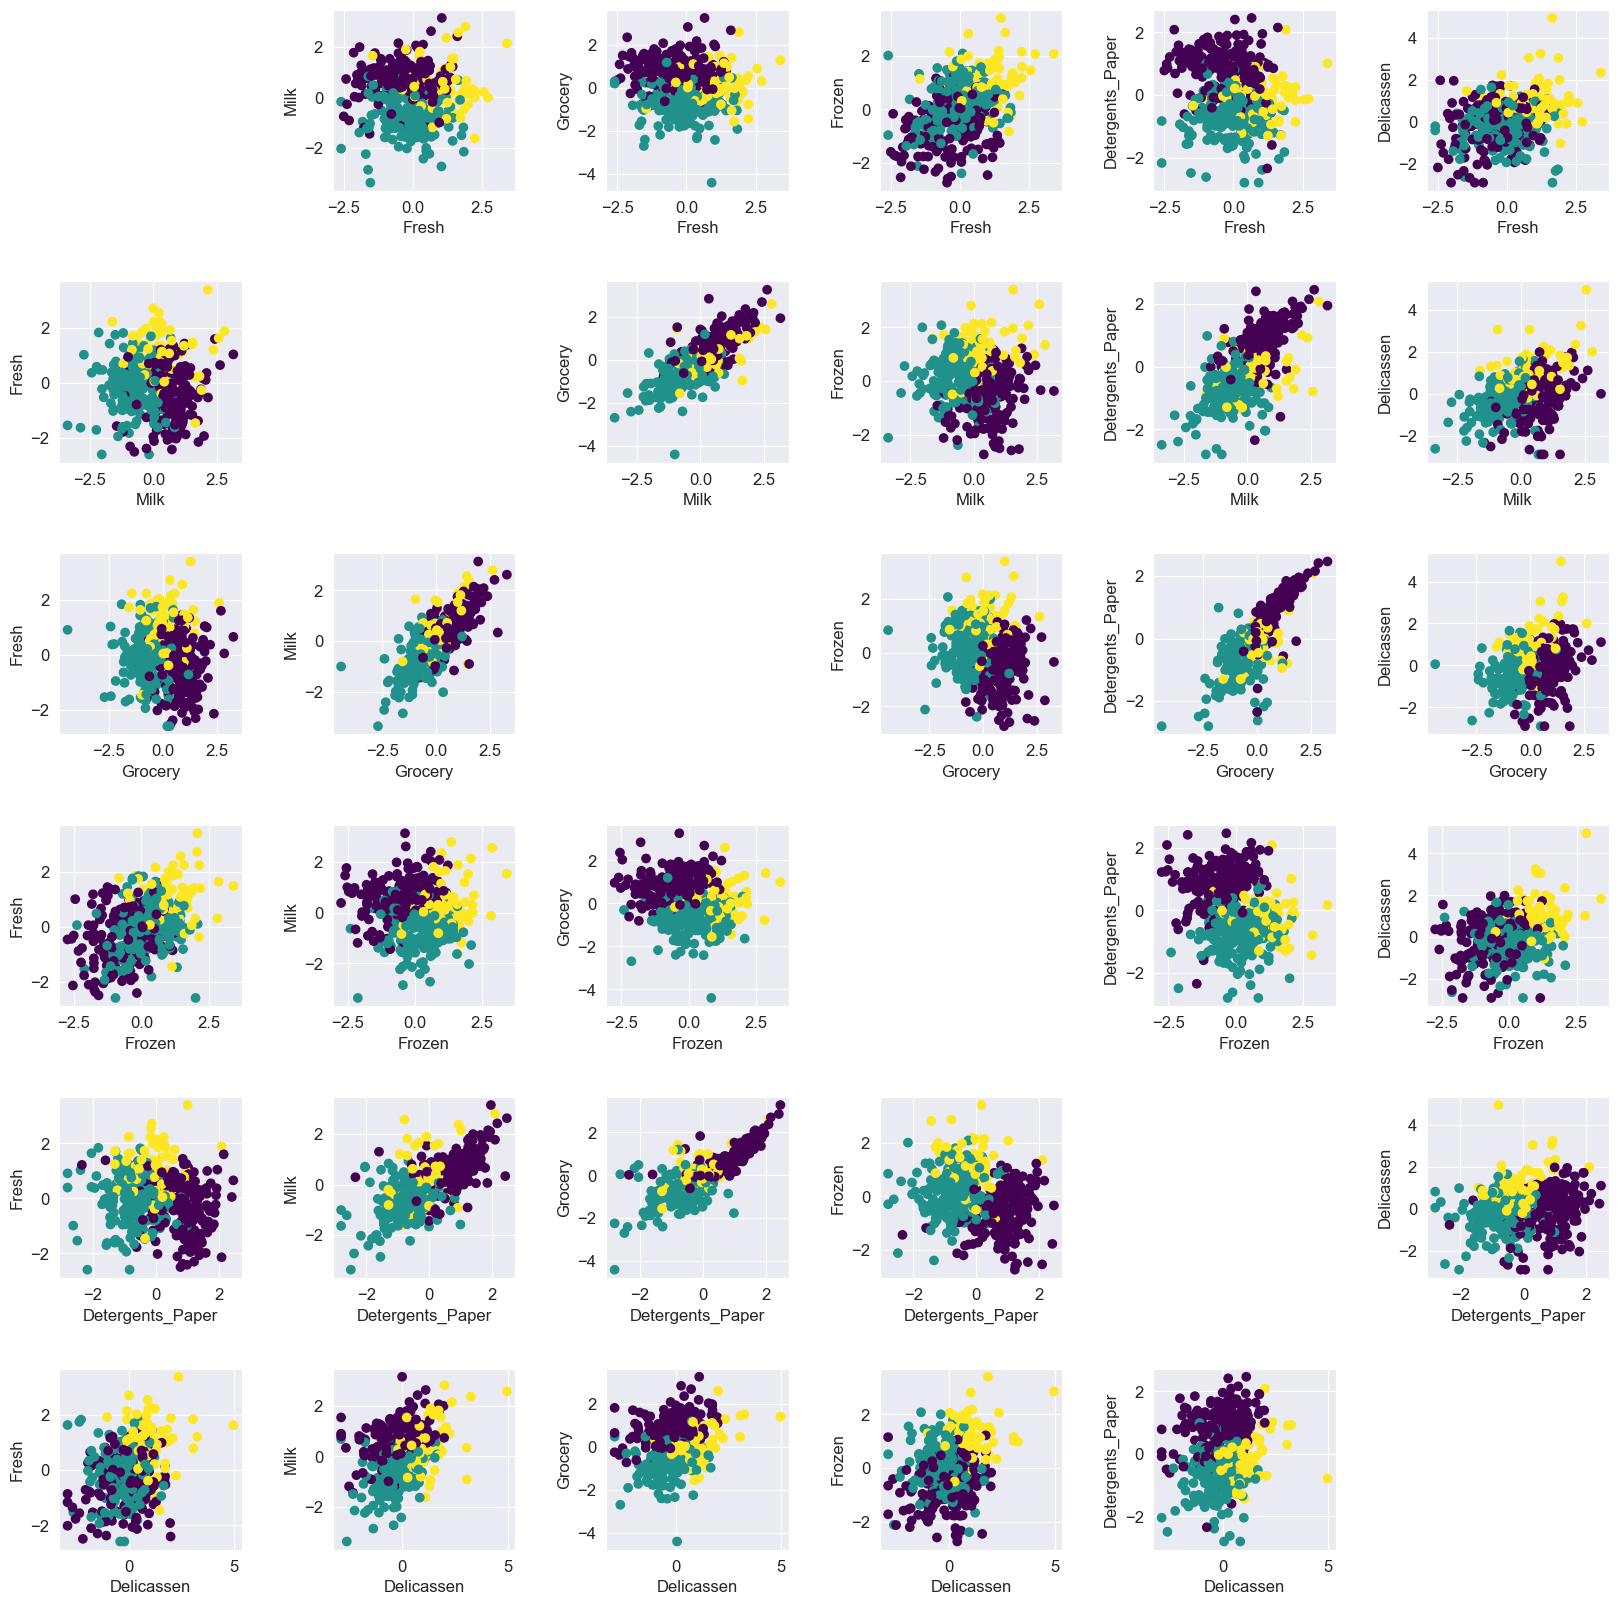

In [700]:
import matplotlib.pyplot as plt

Abdiel_features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Create a figure with subplots for non-empty pairs of features
fig, axs = plt.subplots(len(Abdiel_features), len(Abdiel_features), figsize=(20,20), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, feature1 in enumerate(Abdiel_features):
    for j, feature2 in enumerate(Abdiel_features):
        if i != j:
            # Create a scatter plot with the corresponding cluster labels
            axs[i][j].scatter(Abdiel_df[feature1], Abdiel_df[feature2], c=Abdiel_df["cluster_labels"], cmap="viridis")
            axs[i][j].set_xlabel(feature1)
            axs[i][j].set_ylabel(feature2)
        else:
            # Remove empty subplots
            axs[i][j].remove()

plt.show()

In [701]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix
Abdiel_Z = linkage(Abdiel_df[numerical_cols], 'ward')

# Create dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Abdiel_Z, leaf_font_size=10, leaf_rotation=90)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

One way to determine the optimal number of clusters for Agglomerative Clustering is to use a dendrogram, which displays the hierarchy of the clusters. We can visually inspect the dendrogram and identify the number of clusters that seem to be most meaningful based on the height of the branches.

In this code, we first import the scipy.cluster.hierarchy library to calculate the linkage matrix using the 'ward' method, which minimizes the variance of the distances between the clusters being merged. We then create a dendrogram using the dendrogram function and pass in the linkage matrix. We set the font size and rotation of the leaf nodes using the leaf_font_size and leaf_rotation parameters, and add the axis labels and title using the xlabel, ylabel, and title functions. Finally, we show the plot using the show function.

The resulting dendrogram will show the hierarchy of the clusters, where the height of the branches represents the distance between the clusters being merged. We can then visually inspect the dendrogram to determine the optimal number of clusters.

In [702]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers to test
Abdiel_cluster_range = range(2, 11)

# Calculate silhouette score for different numbers of clusters
Abdiel_silhouette_scores = []
for n_clusters in Abdiel_cluster_range:
    # Fit the agglomerative clustering model to the data
    Abdiel_clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    Abdiel_labels = Abdiel_clusterer.fit_predict(Abdiel_df[numerical_cols])

    # Calculate the silhouette score for the current number of clusters
    Abdiel_score = silhouette_score(Abdiel_df[numerical_cols], Abdiel_labels)
    Abdiel_silhouette_scores.append(Abdiel_score)
    print("Silhouette score for", n_clusters, "clusters:", Abdiel_score)



Silhouette score for 2 clusters: 0.25761245073308153
Silhouette score for 3 clusters: 0.23671983160394067
Silhouette score for 4 clusters: 0.18202626922610593
Silhouette score for 5 clusters: 0.16079243761447115
Silhouette score for 6 clusters: 0.15796344330296833
Silhouette score for 7 clusters: 0.1596440668790284
Silhouette score for 8 clusters: 0.15120334445298952
Silhouette score for 9 clusters: 0.14771072304342728
Silhouette score for 10 clusters: 0.1075257818434912


If the dendrogram is not readable, we can use another method to determine the optimal number of clusters for Agglomerative Clustering. One approach is to use the silhouette score, which measures how well each data point belongs to its assigned cluster compared to other clusters.

In this code, we first import the AgglomerativeClustering and silhouette_score functions from the sklearn.cluster and sklearn.metrics modules, respectively. We then load the data and loop through different numbers of clusters from 2 to 10. For each number of clusters, we create an Agglomerative Clustering model using the 'ward' linkage method, fit the model to the data, predict the cluster labels, and calculate the silhouette score using the silhouette_score function. Finally, we print out the silhouette score for each number of clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the data points are very well-clustered, while a score of -1 indicates that the data points are misclassified. A score of 0 indicates overlapping clusters.

We can then plot the silhouette score for different numbers of clusters to visualize the optimal number of clusters. Here's the code to create the plot:



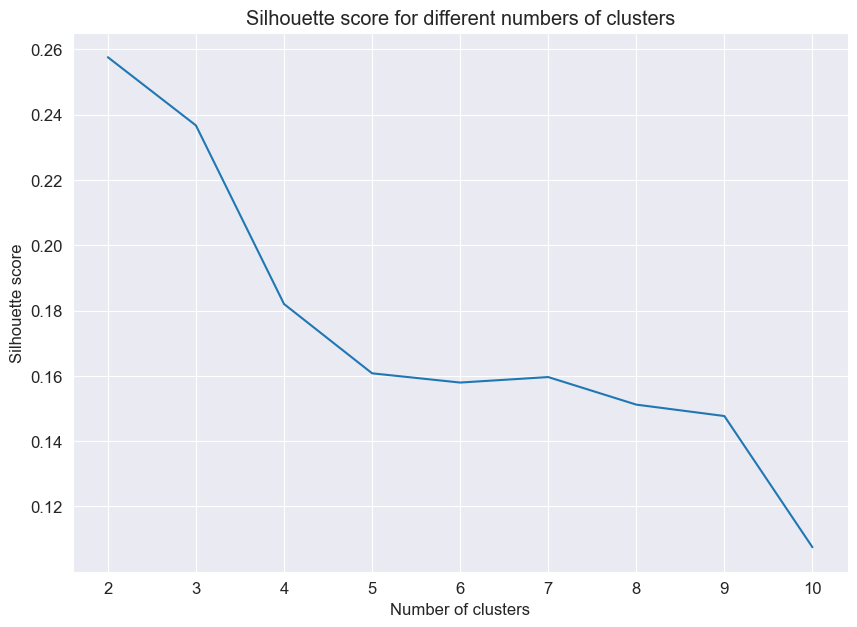

In [703]:
# Plot silhouette score for different numbers of clusters
plt.plot(Abdiel_cluster_range, Abdiel_silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different numbers of clusters')
plt.show()


The resulting plot will show the silhouette score for different numbers of clusters. The optimal number of clusters will correspond to the highest silhouette score, which indicates the best clustering. We can then choose that number of clusters for our Agglomerative Clustering model.

In [704]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Abdiel_X = Abdiel_df[numerical_cols]

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    Abdiel_model = AgglomerativeClustering(n_clusters=2, linkage=method)
    Abdiel_labels = Abdiel_model.fit_predict(Abdiel_X)
    Abdiel_score = silhouette_score(Abdiel_X, Abdiel_labels)
    print(f"Linkage method: {method}, Silhouette score: {Abdiel_score}")


Linkage method: ward, Silhouette score: 0.25761245073308153
Linkage method: complete, Silhouette score: 0.20952531958736123
Linkage method: average, Silhouette score: 0.5291162952334703
Linkage method: single, Silhouette score: 0.5291162952334703


In [705]:
# set the number of clusters you want to form
Abdiel_n_clusters = 2

# create an instance of AgglomerativeClustering and fit the preprocessed data
Abdiel_model = AgglomerativeClustering(n_clusters=Abdiel_n_clusters, affinity='euclidean', linkage='complete')
Abdiel_model.fit(Abdiel_df[numerical_cols])

# get the predicted labels for each data point
Abdiel_labels = Abdiel_model.labels_

# add cluster labels to the original dataframe
Abdiel_df['cluster_labels'] = Abdiel_labels

# print the updated dataframe
Abdiel_df.head()


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3   0.41  0.98     0.39   -1.46              0.62   
1        2       3  -0.11  1.00     0.63    0.08              0.75   
2        2       3  -0.20  0.89     0.41    0.33              0.79   
3        1       3   0.46 -0.97    -0.15    1.17             -0.37   
4        2       3   1.03  0.41     0.35    0.74              0.37   

   Delicassen  cluster_labels  
0        0.34               0  
1        0.60               0  
2        2.24               0  
3        0.61               1  
4        1.74               0

In [706]:
import matplotlib.pyplot as plt

Abdiel_features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Create a figure with subplots for non-empty pairs of features
fig, axs = plt.subplots(len(Abdiel_features), len(Abdiel_features), figsize=(20,20), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, feature1 in enumerate(Abdiel_features):
    for j, feature2 in enumerate(Abdiel_features):
        if i != j:
            # Create a scatter plot with the corresponding cluster labels
            axs[i][j].scatter(Abdiel_df[feature1], Abdiel_df[feature2], c=Abdiel_df["cluster_labels"], cmap="viridis")
            axs[i][j].set_xlabel(feature1)
            axs[i][j].set_ylabel(feature2)
        else:
            # Remove empty subplots
            axs[i][j].remove()

plt.show()
